# Data & Imports

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats.mstats import winsorize

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
def tukey_outliers(df, var):
    q75, q25 = np.percentile(df[var], [75, 25])
    iqr = q75 - q25

    for threshold in np.arange(1, 5, 0.5):
        min_val = q25 - (iqr * threshold)
        max_val = q75 + (iqr * threshold)
        print("The score threshold is: {}".format(threshold))
        print(
            "Number of outliers is: {}".format(
                len((np.where((df[var] > max_val) | (df[var] < min_val))[0]))
            )
        )

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "lifeexpectancy"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM lifeexpectancy
"""
df = pd.read_sql_query(query, con=conn_str)
# df.head()

<IPython.core.display.Javascript object>

# 1. Detect the problems with the data, such as missing values and outliers.

Are there any nonsense values that seem to be stemmed from the data collection?
For the missing values, discuss which technique would be the most suitable for filling out these values.
Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [4]:
# lowercase column names
df.columns = map(str.lower, df.columns)
# strip whitespace from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# drop null values for life expectancy
df.dropna(subset=["life expectancy"], inplace=True)

<IPython.core.display.Javascript object>

In [6]:
# percentage null values
df.isnull().mean().sort_values(ascending=False)

population                         0.219945
hepatitis b                        0.188866
gdp                                0.151298
total expenditure                  0.077186
alcohol                            0.065915
schooling                          0.054645
income composition of resources    0.054645
bmi                                0.010929
thinness  1-19 years               0.010929
thinness 5-9 years                 0.010929
diphtheria                         0.006489
polio                              0.006489
under-five deaths                  0.000000
hiv/aids                           0.000000
measles                            0.000000
percentage expenditure             0.000000
infant deaths                      0.000000
adult mortality                    0.000000
life expectancy                    0.000000
status                             0.000000
year                               0.000000
country                            0.000000
dtype: float64

<IPython.core.display.Javascript object>

> all missing values are numeric floats
---


In [9]:
# using interpolation to fill missing values
df = df.sort_values("year")
for val in df.country.unique():

    for var in [
        "hepatitis b",
        "gdp",
        "total expenditure",
        "alcohol",
        "income composition of resources",
        "schooling",
        "bmi",
        "thinness  1-19 years",
        "thinness 5-9 years",
        "diphtheria",
        "polio",
        "adult mortality",
        "life expectancy",
        "population",
    ]:
        df.loc[df.country == val, var] = df.loc[df.country == val, var].interpolate()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 2937 to 0
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   int64  
 2   status                           2928 non-null   object 
 3   life expectancy                  2928 non-null   float64
 4   adult mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   alcohol                          2912 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   hepatitis b                      2784 non-null   float64
 9   measles                          2928 non-null   int64  
 10  bmi                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  polio               

<IPython.core.display.Javascript object>

In [10]:
# percentage null values
df.isnull().mean().sort_values(ascending=False)

population                         0.218579
gdp                                0.136612
schooling                          0.054645
income composition of resources    0.054645
hepatitis b                        0.049180
total expenditure                  0.010929
bmi                                0.010929
thinness  1-19 years               0.010929
thinness 5-9 years                 0.010929
alcohol                            0.005464
diphtheria                         0.000000
hiv/aids                           0.000000
polio                              0.000000
under-five deaths                  0.000000
measles                            0.000000
percentage expenditure             0.000000
infant deaths                      0.000000
adult mortality                    0.000000
life expectancy                    0.000000
status                             0.000000
year                               0.000000
country                            0.000000
dtype: float64

<IPython.core.display.Javascript object>

> Since all vars had null percentages below 25% I used interpolation for the missing values bc the distribution shape didn't allow for any other stats functions
---

## Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22af8a496a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22af8a49d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22af8a49340>],
 'medians': [<matplotlib.lines.Line2D at 0x22af8d35f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x22af8d35790>],
 'means': []}

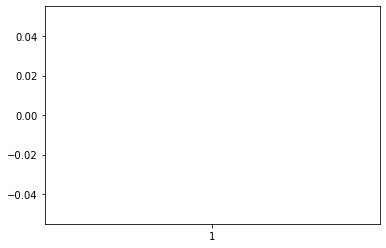

<IPython.core.display.Javascript object>

In [20]:
interest_vars = [
    "total expenditure",
    "schooling",
    "gdp",
    "alcohol",
    "bmi",
    "adult mortality",
    "income composition of resources",
    "percentage expenditure",
    "measles",
    "hiv/aids",
    "hepatitis b",
    "polio",
    "diphtheria",
]

secondary_vars = [
    "measles",
    "hiv/aids",
    "hepatitis b",
    "polio",
    "diphtheria",
    "life expectancy",
]

# for var in interest_vars:
#     print(var)
#     plt.boxplot(df[var].dropna())
#     plt.show()

<IPython.core.display.Javascript object>

In [9]:
tukey_outliers(df, "income composition of resources")

The score threshold is: 1.0
Number of outliers is: 130
The score threshold is: 1.5
Number of outliers is: 130
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


<IPython.core.display.Javascript object>

In [ ]:
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)
    
    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print('VIF results\n-------------------------------')
    print(pd.Series(vifs, index=x.columns))
    print('-------------------------------\n')

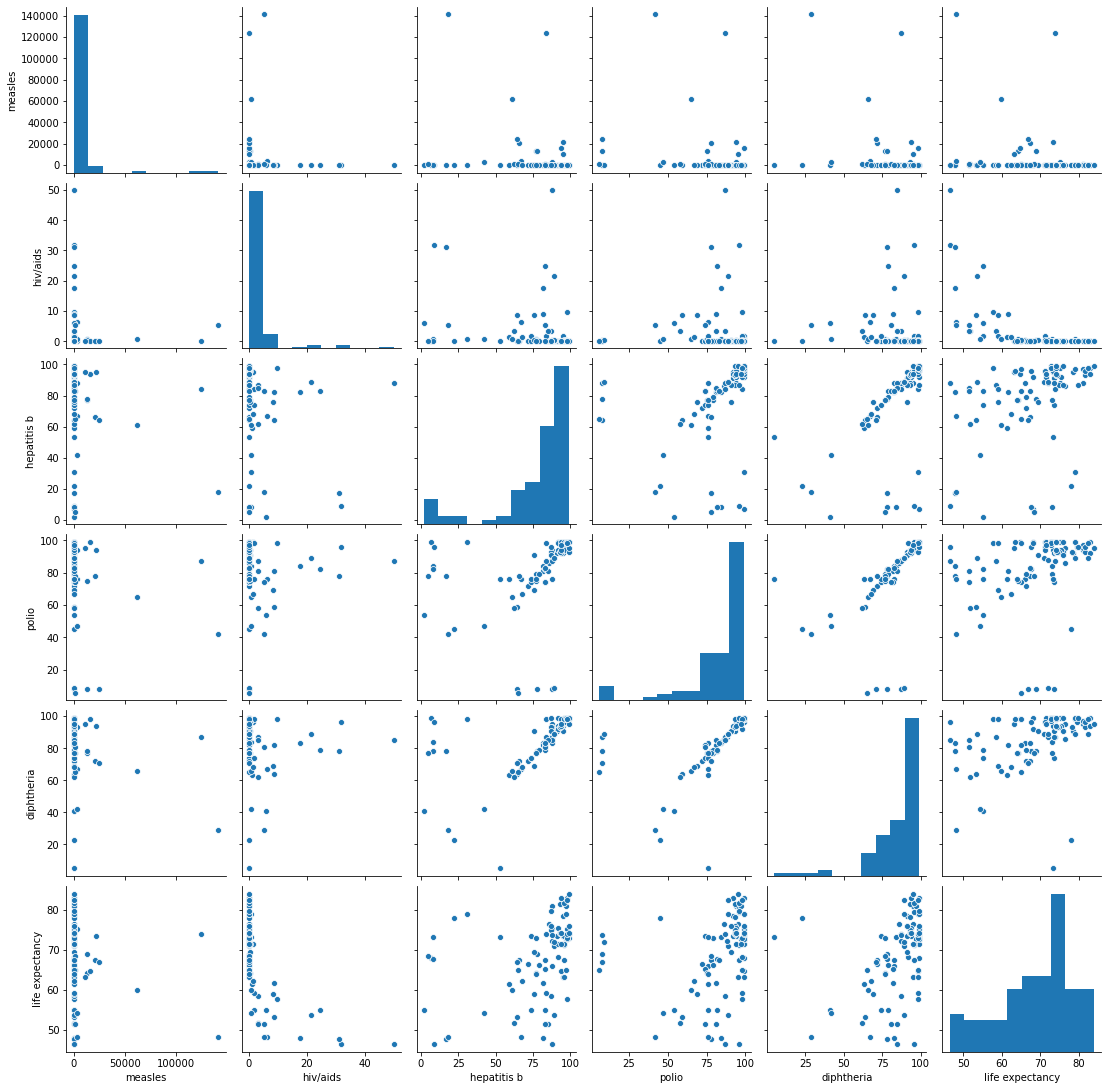

<IPython.core.display.Javascript object>

In [22]:
sns.pairplot(df[secondary_vars].sample(100))
plt.show()

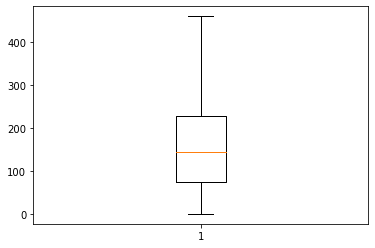

<IPython.core.display.Javascript object>

In [10]:
# winsorize adult mortality
win_adult_mortality = winsorize(df["adult mortality"], (0, 0.0285))
plt.boxplot(win_adult_mortality)
plt.show()

# create new var for the winsorized total expenditure
df["win_adult_mortality"] = win_adult_mortality

---
> GDP

In [11]:
# log transform of gdp var
df["log_gdp"] = np.log(df.gdp)
# sqrt transform of measles & hiv vars
df["sqrt_measles"] = np.sqrt(df.measles)
df["sqrt_hiv"] = np.sqrt(df["hiv/aids"])

<IPython.core.display.Javascript object>

log_gdp


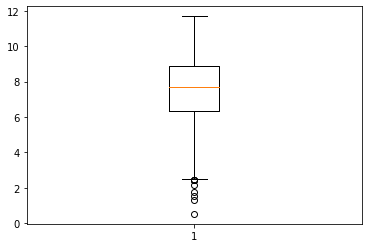

sqrt_measles


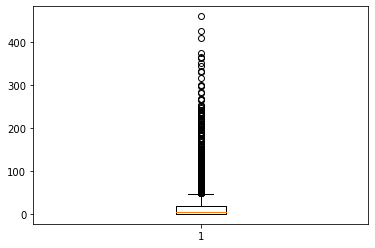

sqrt_hiv


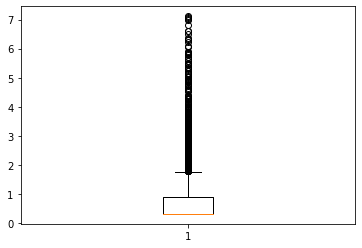

<IPython.core.display.Javascript object>

In [13]:
for var in ["log_gdp", "sqrt_measles", "sqrt_hiv"]:
    print(var)
    plt.boxplot(df[var])
    plt.show()

In [14]:
tukey_outliers(df, "log_gdp")

The score threshold is: 1.0
Number of outliers is: 74
The score threshold is: 1.5
Number of outliers is: 9
The score threshold is: 2.0
Number of outliers is: 1
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


<IPython.core.display.Javascript object>

---
> Total Expenditure

In [15]:
tukey_outliers(df, "total expenditure")

The score threshold is: 1.0
Number of outliers is: 119
The score threshold is: 1.5
Number of outliers is: 33
The score threshold is: 2.0
Number of outliers is: 20
The score threshold is: 2.5
Number of outliers is: 10
The score threshold is: 3.0
Number of outliers is: 6
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


<IPython.core.display.Javascript object>

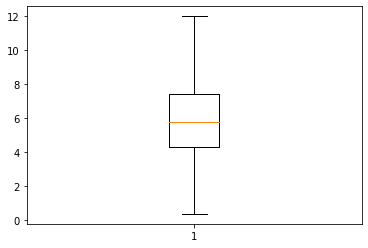

<IPython.core.display.Javascript object>

In [16]:
# winsorize total expenditure
win_total_expenditure = winsorize(df["total expenditure"], (0, 0.0125))
plt.boxplot(win_total_expenditure)
plt.show()

# create new var for the winsorized total expenditure
df["win_total_expenditure"] = win_total_expenditure

---

---
> Schooling

In [17]:
tukey_outliers(df, "schooling")

The score threshold is: 1.0
Number of outliers is: 198
The score threshold is: 1.5
Number of outliers is: 51
The score threshold is: 2.0
Number of outliers is: 26
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


<IPython.core.display.Javascript object>

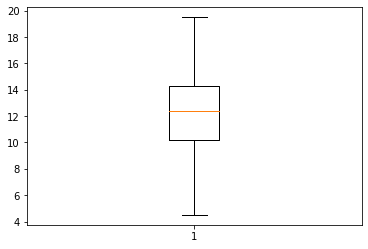

<IPython.core.display.Javascript object>

In [18]:
# winsorize schooling
win_schooling = winsorize(df["schooling"], (0.02, 0.005))
plt.boxplot(win_schooling)
plt.show()

# create new var for the winsorized schooling
df["win_schooling"] = win_schooling

win_total_expenditure


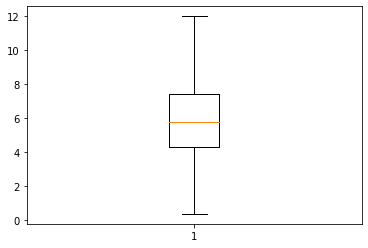

win_schooling


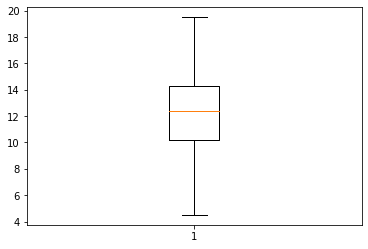

log_gdp


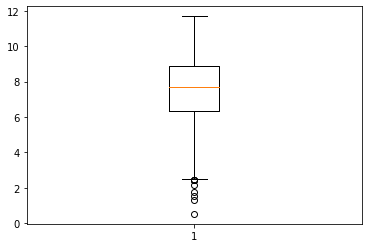

alcohol


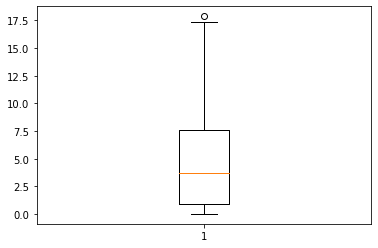

bmi


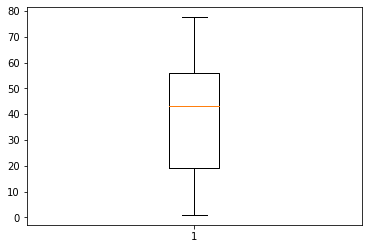

sqrt_hiv


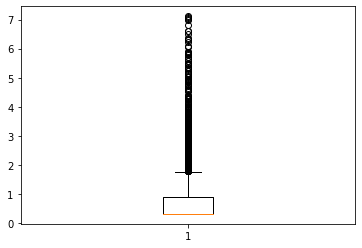

income composition of resources


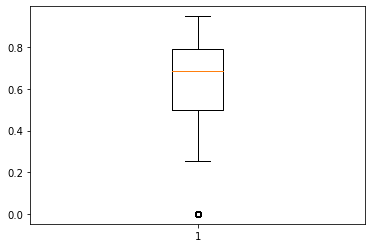

win_adult_mortality


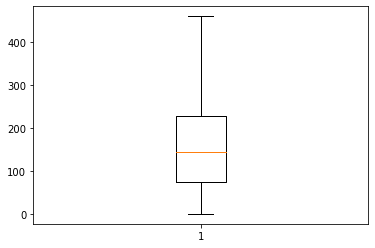

<IPython.core.display.Javascript object>

In [20]:
interest_vars = [
    "win_total_expenditure",
    "win_schooling",
    "log_gdp",
    "alcohol",
    "bmi",
    "sqrt_hiv",
    "income composition of resources",
    "win_adult_mortality",
]

secondary_vars = [
    "measles",
    "hiv/aids",
    "hepatitis b",
    "polio",
    "diphtheria",
]

for var in interest_vars:
    print(var)
    plt.boxplot(df[var])
    plt.show()

---
---

# 2. Explore the data using univariate and multivariate exploration techniques. 
Be sure to pay special attention to your target variable. In this regard, focus on finding the relevant variables that may affect life expectancy.

In [21]:
df.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,win_adult_mortality,log_gdp,sqrt_measles,sqrt_hiv,win_total_expenditure,win_schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,263.0,6.370345,33.970576,0.316228,8.16,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,271.0,6.417870,22.181073,0.316228,8.18,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,268.0,6.448486,20.736441,0.316228,8.13,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,272.0,6.507217,52.792045,0.316228,8.52,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,275.0,4.151626,54.890801,0.316228,7.87,9.5


<IPython.core.display.Javascript object>

In [23]:
interest_df = df[
    [
        "life expectancy",
        "log_gdp",
        "win_schooling",
        "bmi",
        "income composition of resources",
        "sqrt_hiv",
        "win_adult_mortality",
    ]
]

<IPython.core.display.Javascript object>

## Univariate

In [25]:
vars = [
    "life expectancy",
    "log_gdp",
    "win_schooling",
    "bmi",
    "income composition of resources",
    "sqrt_hiv",
    "win_adult_mortality",
]

<IPython.core.display.Javascript object>

In [26]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import jarque_bera

<IPython.core.display.Javascript object>

life expectancy
Normal: False


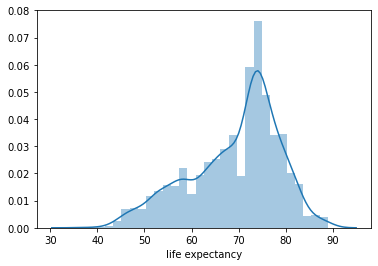

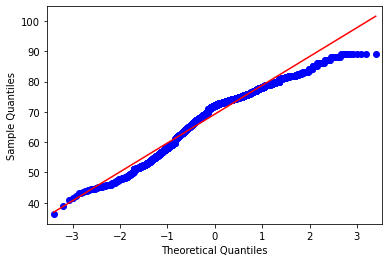

log_gdp
Normal: False


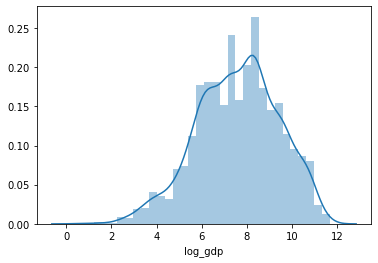

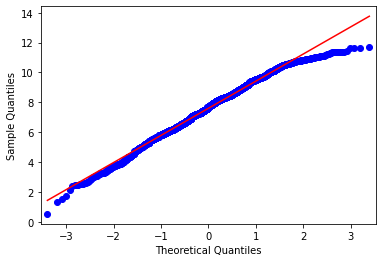

win_schooling
Normal: False


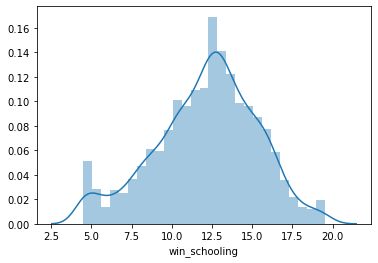

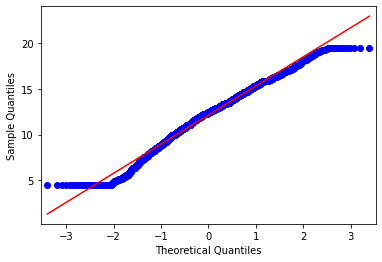

bmi
Normal: False


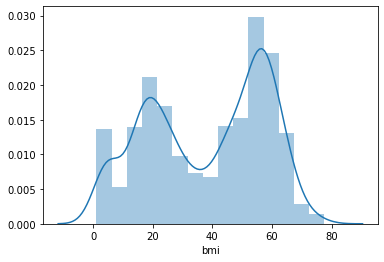

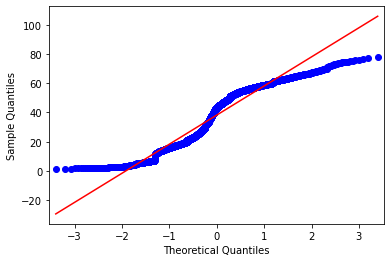

income composition of resources
Normal: False


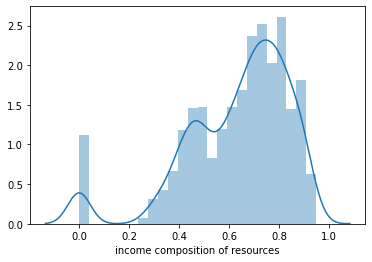

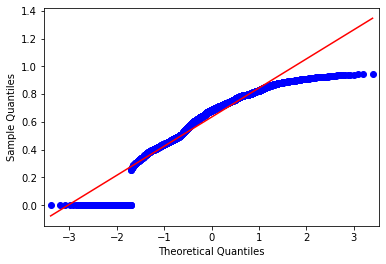

sqrt_hiv
Normal: False


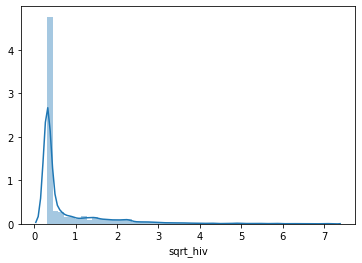

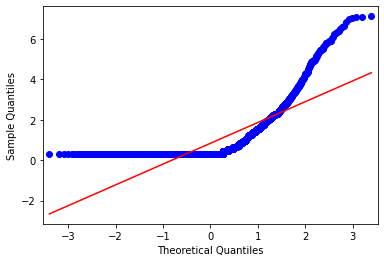

win_adult_mortality
Normal: False


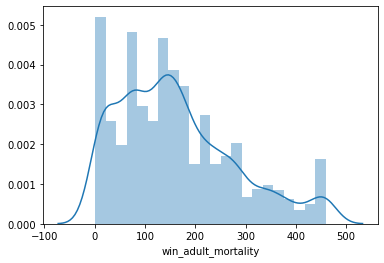

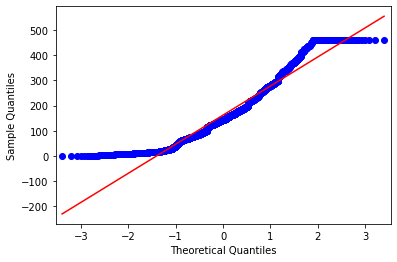

<IPython.core.display.Javascript object>

In [27]:
for var in vars:
    print(var)
    t, p = jarque_bera(df[var])
    print("Normal: " + str(p > 0.05))
    sns.distplot(df[var])
    plt.show()
    qqplot(df[var], line="s")
    plt.show()

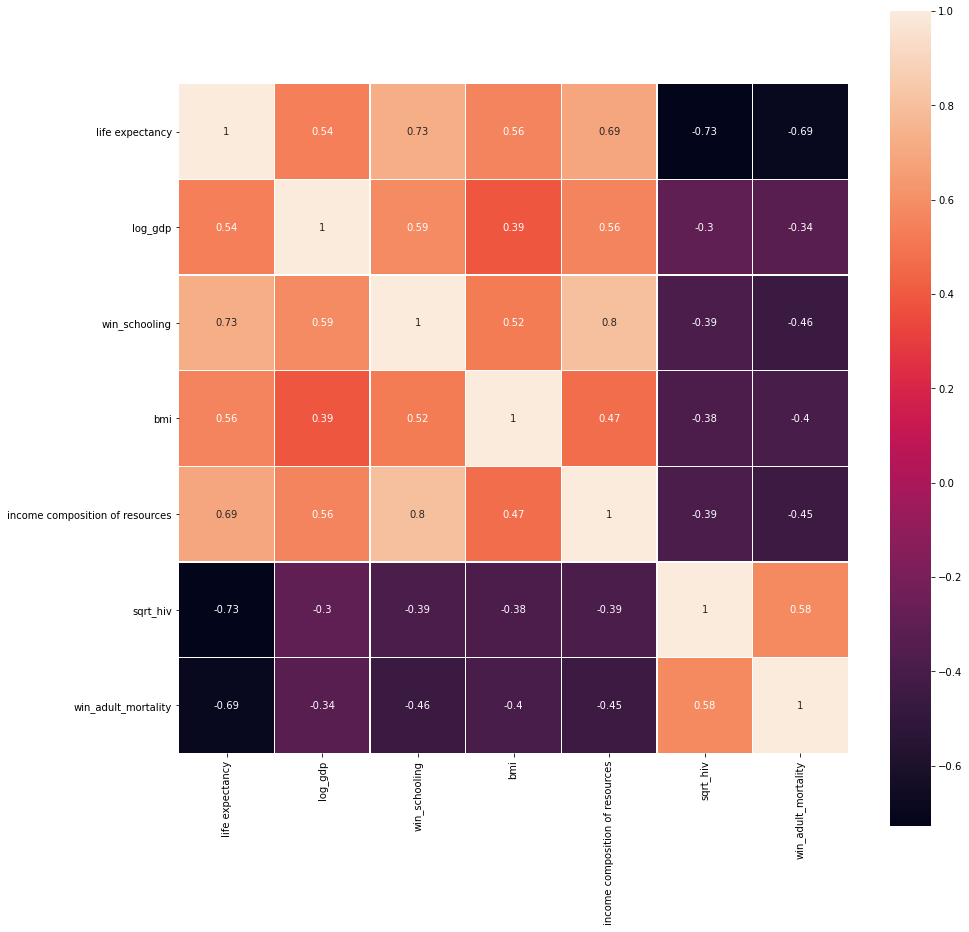

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 15))
var_corr = interest_df.corr()
sns.heatmap(var_corr, square=True, annot=True, linewidths=0.5)
plt.show()

> It looks like the win_schooling, sqrt_hiv, win_adult_mortality, and income composition of resources are the most correlated vars
---

# Modeling Variables
* log_gdp
* win_schooling
* bmi
* income composition of resources
* sqrt_hiv
* adult mortality

In [29]:
drop_cols = [
    "country",
    "year",
    "status",
    "infant deaths",
    "life expectancy",
    "hiv/aids",
    "schooling",
]

keep_cols = [
    "adult mortality",
    "alcohol",
    "bmi",
    "total expenditure",
    "hiv/aids",
    "gdp",
    "population",
    "thinness  1-19 years",
    "thinness 5-9 years",
    "income composition of resources",
    "schooling",
    "log_gdp",
    "sqrt_measles",
    "sqrt_hiv",
    "win_total_expenditure",
    "win_schooling",
]

<IPython.core.display.Javascript object>

In [25]:
df.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,win_adult_mortality,log_gdp,sqrt_measles,sqrt_hiv,win_total_expenditure,win_schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,263.0,6.370345,33.970576,0.316228,8.16,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,271.0,6.417870,22.181073,0.316228,8.18,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,268.0,6.448486,20.736441,0.316228,8.13,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,272.0,6.507217,52.792045,0.316228,8.52,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,275.0,4.151626,54.890801,0.316228,7.87,9.5


<IPython.core.display.Javascript object>

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

<IPython.core.display.Javascript object>

In [34]:
X_train = df.drop(
    columns=(
        [
            "country",
            "year",
            "status",
            "life expectancy",
            "hiv/aids",
            "schooling",
            "adult mortality",
            "gdp",
            "percentage expenditure",
        ]
    )
)
y_train = df["life expectancy"]

<IPython.core.display.Javascript object>

In [35]:
# Storing columns since we're going to overwrite
# X with a numpy array (which will delete its column names)
cols = X_train.columns

# Perform ANOVAs for each of our features and outcome
selector = SelectKBest(f_classif, k=5)
X_train = selector.fit_transform(X_train, y_train)

# We don't have to transform this back into a dataframe
# this is just being done for better display
selected_cols = cols[selector.get_support()]
X_train = pd.DataFrame(X_train, columns=selected_cols, index=y_train.index)
X_train.head(1)

,income composition of resources,win_adult_mortality,log_gdp,sqrt_hiv,win_schooling
0,0.479,263.0,6.370345,0.316228,10.1


<IPython.core.display.Javascript object>

> Variables of interest:
* income composition of resources
* win_adult_mortality
* log_gdp
* sqrt_hiv
* win_schooling